In [129]:
import numpy as np
np.random.seed(2021)
import pandas as pd
import re
from sklearn.utils import shuffle
import ml_metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random

# Data Processing

In [130]:
spotify_data = pd.read_csv('spotify.csv')
spotify_data = spotify_data[['user_id', 'track']]
spotify_data = spotify_data.rename(columns={'track': 'song_id'})
spotify_data = spotify_data.drop_duplicates()
spotify_data['rating'] = 1
spotify_data

,user_id,song_id,rating
0,07f0fc3be95dcd878966b1f9572ff670,Destiny,1
1,07f0fc3be95dcd878966b1f9572ff670,The Truth,1
2,07f0fc3be95dcd878966b1f9572ff670,Digital Love,1
3,07f0fc3be95dcd878966b1f9572ff670,Fall,1
4,07f0fc3be95dcd878966b1f9572ff670,Finale,1
...,...,...,...
352657,488ead471813ae982119153f792e4a3e,I Wanna Go,1
352658,488ead471813ae982119153f792e4a3e,Judas,1
352660,488ead471813ae982119153f792e4a3e,Paparazzi,1
352662,488ead471813ae982119153f792e4a3e,Till the World Ends,1


In [131]:
# shuffle the data
spotify_shuffled = shuffle(spotify_data, random_state=23)
spotify_shuffled

,user_id,song_id,rating
147080,d27b982e6ef051d4e6c28438cac7db83,Don't Dream It's Over,1
327,7511e45f2cc6f6e609ae46c15506538c,Changes - Original Mix,1
171027,d781ca12e822ada932de406b9e57deba,Fall,1
294770,b63964e0e12fc20c86e46769963fc1bc,Hunter,1
72213,559beeaa882170d8ca561ed83abeabb0,Shut Up and Dance,1
...,...,...,...
250704,a2331bea1c239309afe389ed7d2bf697,I Feel Better,1
336218,48937586c1d946fae0904744bb7c430e,Dance With Me,1
275432,decd7531e86ee5d4180f2f1dde5ff343,99 Red Balloons,1
335605,ea289c81366cec97152fc68337e4f137,My Baby Just Cares For Me,1


In [132]:
# train test split
spotify_train=spotify_shuffled.groupby(['user_id']).apply(lambda x : x.head(round(len(x)*0.8))).reset_index(drop = True)
spotify_test=spotify_shuffled.groupby(['user_id']).apply(lambda x : x.tail(round(len(x)*0.2))).reset_index(drop = True)

In [133]:
spotify_train

,user_id,song_id,rating
0,00287ecf491882a40ff34b0fd75a5b16,Nothing Compares 2 U,1
1,00287ecf491882a40ff34b0fd75a5b16,About A Girl,1
2,00287ecf491882a40ff34b0fd75a5b16,Wherever You Will Go,1
3,00287ecf491882a40ff34b0fd75a5b16,Wild World,1
4,00287ecf491882a40ff34b0fd75a5b16,Video Killed The Radio Star,1
...,...,...,...
228070,ff83b4f72197d1c04338887bbebb9ce1,Ms. Jackson,1
228071,ff83b4f72197d1c04338887bbebb9ce1,Move,1
228072,ff83b4f72197d1c04338887bbebb9ce1,My Hero,1
228073,ff83b4f72197d1c04338887bbebb9ce1,Dumb,1


In [134]:
# Creating a sparse pivot table with users in rows and items in columns
users_items_matrix = spotify_train.pivot_table(index = 'user_id', columns = 'song_id', values = 'rating', fill_value = 0)
users_items_matrix

song_id,'Till I Collapse,(Don't Fear) The Reaper,(Sittin' On) The Dock Of The Bay,...Baby One More Time,21 Guns,40 Day Dream,5 Years Time,99 Problems,99 Red Balloons,A Case Of You,...,You Oughta Know,You Really Got Me,You and I,You're Beautiful,"You're Gonna Go Far, Kid",Young And Beautiful,"Young, Wild & Free (feat. Bruno Mars)",Zero,i,m.A.A.d city
user_id,,,,,,,,,,,,,,,,,,,,,
00287ecf491882a40ff34b0fd75a5b16,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00526df8fabfb8c8605f180ed1880754,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
00909b16e60501d9da9acf7bd2c5b00d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00ba6890ed516e47967114c2f75bbe35,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
00be8fa9d10f6318156fa753857597cf,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff02074397d6385f122f36cc11372fc6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
ff07dd0a6facfba39bca491ec9dd5068,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
ff6a160f76014ae59888eab018f03375,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [135]:
spotify_test

,user_id,song_id,rating
0,00287ecf491882a40ff34b0fd75a5b16,I Don't Care,1
1,00287ecf491882a40ff34b0fd75a5b16,The High Road,1
2,00287ecf491882a40ff34b0fd75a5b16,The Way It Is,1
3,00287ecf491882a40ff34b0fd75a5b16,Take Me to Church,1
4,00287ecf491882a40ff34b0fd75a5b16,It's Like That,1
...,...,...,...
57016,ff83b4f72197d1c04338887bbebb9ce1,Judas,1
57017,ff83b4f72197d1c04338887bbebb9ce1,Do You Remember,1
57018,ff83b4f72197d1c04338887bbebb9ce1,Don't Panic,1
57019,ff83b4f72197d1c04338887bbebb9ce1,Always On My Mind,1


In [136]:
test_df = spotify_test.groupby('user_id').agg(list).sort_index()
test_df

,song_id,rating
user_id,,
00287ecf491882a40ff34b0fd75a5b16,"[I Don't Care, The High Road, The Way It Is, T...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
00526df8fabfb8c8605f180ed1880754,"[This Is How We Do, Rock Your Body, Hide And S...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
00909b16e60501d9da9acf7bd2c5b00d,"[River, The Sound of Silence, Mr. Tambourine M...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
00ba6890ed516e47967114c2f75bbe35,"[Disarm, Punching In A Dream, Clint Eastwood, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
00be8fa9d10f6318156fa753857597cf,"[The Fear, Young And Beautiful, Stand By Me, N...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...
ff02074397d6385f122f36cc11372fc6,"[I Need You, Under Pressure, Bliss, Hotel Cali...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
ff07dd0a6facfba39bca491ec9dd5068,"[Habits (Stay High), Marry You, High And Dry, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
ff6a160f76014ae59888eab018f03375,"[Blue Jeans, You Make Me, Say My Name, I Follo...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


# Models

In [137]:
def get_length(matrix_lst):
    len_vec = []
    for vec in matrix_lst:
        length = np.sqrt(sum(vec ** 2))
        len_vec.append(length)
    return len_vec

## NMF Model

In [138]:
from sklearn.decomposition import NMF

# number of recommendation for new user or new items
num_recommendation_nmf = 10
# number of features representing every user and item
total_topics_nmf = 8
nmf = NMF(n_components=total_topics_nmf, random_state=2017)
nmf.fit(users_items_matrix)
print('completed')

C:\Users\GAN BINGZHENG\anaconda3\envs\keras_env\lib\site-packages\sklearn\decomposition\_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


completed


In [139]:
# item vector
item_matrix_nmf = nmf.components_.T
print(item_matrix_nmf.shape)
print(item_matrix_nmf)

(1335, 8)
[[0.         0.04524063 0.         ... 0.62240659 0.06821934 0.        ]
 [0.03209263 0.         0.39287831 ... 0.         0.02613713 0.03652961]
 [0.02002384 0.         0.69020878 ... 0.18418759 0.06153076 0.        ]
 ...
 [0.32769162 0.         0.         ... 0.         0.         0.23377793]
 [0.16300578 0.         0.         ... 0.52581119 0.         0.        ]
 [0.12546796 0.         0.         ... 0.77739629 0.         0.        ]]


In [140]:
# user vector
user_matrix_nmf = nmf.transform(users_items_matrix)
print(user_matrix_nmf.shape)
print(user_matrix_nmf)

(2206, 8)
[[2.23999993e-04 1.96464732e-01 2.27375109e-01 ... 7.26755673e-03
  0.00000000e+00 2.61388629e-01]
 [0.00000000e+00 3.32378619e-01 0.00000000e+00 ... 1.17133245e-01
  3.62187867e-02 1.14306705e-02]
 [0.00000000e+00 0.00000000e+00 9.16218865e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.00514805e-01 1.76134743e-01 0.00000000e+00 ... 2.89694126e-01
  6.16700676e-02 4.56697269e-02]
 [0.00000000e+00 4.41517024e-01 0.00000000e+00 ... 1.87672234e-01
  0.00000000e+00 0.00000000e+00]
 [9.93020685e-02 3.23371195e-01 3.47220913e-02 ... 6.87298182e-02
  0.00000000e+00 0.00000000e+00]]


In [141]:
item_len_nmf = np.array([get_length(item_matrix_nmf)])
print(item_len_nmf.shape)
user_len_nmf = np.transpose(np.array([get_length(user_matrix_nmf)]))
print(user_len_nmf.shape)

(1, 1335)
(2206, 1)


In [142]:
len_matrix_nmf = user_len_nmf.dot(item_len_nmf)
len_matrix_nmf.shape

(2206, 1335)

In [143]:
dot_matrix_nmf = user_matrix_nmf.dot(np.transpose(item_matrix_nmf))
dot_matrix_nmf.shape

(2206, 1335)

In [144]:
cos_sim_matrix_nmf = dot_matrix_nmf / len_matrix_nmf

# the similarity score of items already selected by this user should be high for sure
# their score are set to be zero so will not recommend them to this user
mask_nmf = np.ones(users_items_matrix.shape)
mask_nmf = np.where(users_items_matrix == 1, 0, 1)

cos_sim_matrix_nmf = cos_sim_matrix_nmf * mask_nmf
cos_sim_matrix_nmf

array([[0.06011281, 0.        , 0.55610533, ..., 0.25416995, 0.02238189,
        0.01803621],
       [0.37856742, 0.00786645, 0.10656521, ..., 0.04836772, 0.32090658,
        0.31790116],
       [0.        , 0.14444352, 0.23643358, ..., 0.16653128, 0.06102522,
        0.        ],
       ...,
       [0.81017507, 0.03771192, 0.22740382, ..., 0.1701586 , 0.84530388,
        0.83461461],
       [0.45119485, 0.0335894 , 0.10002593, ..., 0.04877584, 0.37224312,
        0.3854826 ],
       [0.3467451 , 0.32047162, 0.15009967, ..., 0.47989107, 0.25508277,
        0.21585309]])

In [145]:
cos_sim_matrix_nmf_df = pd.DataFrame(data=cos_sim_matrix_nmf, index=users_items_matrix.index, columns=users_items_matrix.columns)
user_rec_name_nmf_df = cos_sim_matrix_nmf_df.apply(lambda x: x.nlargest(num_recommendation_nmf).index.tolist(), axis=1)
user_rec_score_nmf_df = cos_sim_matrix_nmf_df.apply(lambda x: x.nlargest(num_recommendation_nmf).tolist(), axis=1)
user_rec_nmf_df = pd.concat([user_rec_name_nmf_df, user_rec_score_nmf_df], axis=1)
user_rec_nmf_df

,0,1
user_id,,
00287ecf491882a40ff34b0fd75a5b16,"[Like A Prayer, Summer Of '69, I Will Always L...","[0.9814370198298931, 0.9811805399227811, 0.976..."
00526df8fabfb8c8605f180ed1880754,"[Where Have You Been, Man Down, Disturbia, Thi...","[0.9889854013969794, 0.973276736173593, 0.9730..."
00909b16e60501d9da9acf7bd2c5b00d,"[Prologue, Somewhere, Overture, Come On, Silen...","[0.9952404647152353, 0.9892895453383475, 0.987..."
00ba6890ed516e47967114c2f75bbe35,"[Requiem, Come Back, Good Enough, Salvation, D...","[0.9651802768359454, 0.9612389398036373, 0.957..."
00be8fa9d10f6318156fa753857597cf,"[Stormy Weather, Walk On By, Downtown, Twiligh...","[0.966338512522654, 0.962304106732807, 0.95658..."
...,...,...
ff02074397d6385f122f36cc11372fc6,"[Bohemian Like You, Porcelain, Digital Love, G...","[0.9234151060392111, 0.9208484545595101, 0.920..."
ff07dd0a6facfba39bca491ec9dd5068,"[Fields Of Gold, You Can't Hurry Love, Jump - ...","[0.9906240017037022, 0.9820620693893567, 0.981..."
ff6a160f76014ae59888eab018f03375,"[Faded, Suit & Tie featuring JAY Z, Best I Eve...","[0.9882004573935552, 0.9724813218261794, 0.934..."


In [146]:
# combine the prediction and actual for test data
df_evaluation_nmf =pd.concat([test_df,user_rec_nmf_df], axis=1,ignore_index=False)
df_evaluation_nmf =df_evaluation_nmf[['song_id',0]]
df_evaluation_nmf.columns=['actual','prediction']
df_evaluation_nmf

,actual,prediction
user_id,,
00287ecf491882a40ff34b0fd75a5b16,"[I Don't Care, The High Road, The Way It Is, T...","[Like A Prayer, Summer Of '69, I Will Always L..."
00526df8fabfb8c8605f180ed1880754,"[This Is How We Do, Rock Your Body, Hide And S...","[Where Have You Been, Man Down, Disturbia, Thi..."
00909b16e60501d9da9acf7bd2c5b00d,"[River, The Sound of Silence, Mr. Tambourine M...","[Prologue, Somewhere, Overture, Come On, Silen..."
00ba6890ed516e47967114c2f75bbe35,"[Disarm, Punching In A Dream, Clint Eastwood, ...","[Requiem, Come Back, Good Enough, Salvation, D..."
00be8fa9d10f6318156fa753857597cf,"[The Fear, Young And Beautiful, Stand By Me, N...","[Stormy Weather, Walk On By, Downtown, Twiligh..."
...,...,...
ff02074397d6385f122f36cc11372fc6,"[I Need You, Under Pressure, Bliss, Hotel Cali...","[Bohemian Like You, Porcelain, Digital Love, G..."
ff07dd0a6facfba39bca491ec9dd5068,"[Habits (Stay High), Marry You, High And Dry, ...","[Fields Of Gold, You Can't Hurry Love, Jump - ..."
ff6a160f76014ae59888eab018f03375,"[Blue Jeans, You Make Me, Say My Name, I Follo...","[Faded, Suit & Tie featuring JAY Z, Best I Eve..."


## SVD Model

In [147]:
from sklearn.decomposition import TruncatedSVD

# number of recommendation for new user or new items
num_recommendation_svd = 10
# number of features representing every user and item
total_topics_svd = 8
svd = TruncatedSVD(n_components=total_topics_svd, random_state=2017)
svd.fit(users_items_matrix)
print('completed')

completed


In [148]:
# item vector
item_matrix_svd = svd.components_.T
print(item_matrix_svd.shape)
print(item_matrix_svd)

(1335, 8)
[[ 0.02404961  0.01890804 -0.01281906 ...  0.0574017  -0.03550078
  -0.03646567]
 [ 0.02635211 -0.00248857  0.04781059 ...  0.00997421 -0.01061972
  -0.03146084]
 [ 0.03467329  0.00385162  0.04477119 ...  0.01652136  0.00492672
  -0.04492459]
 ...
 [ 0.03821831 -0.03396656  0.03230259 ...  0.01683994  0.01174374
   0.05685116]
 [ 0.0185315  -0.01016707 -0.02825287 ...  0.06037439 -0.01350474
  -0.0306815 ]
 [ 0.02096161 -0.01813398 -0.03507697 ...  0.08361814 -0.01861175
  -0.02478018]]


In [149]:
# user vector
user_matrix_svd = svd.transform(users_items_matrix)
print(user_matrix_svd.shape)
print(user_matrix_svd)

(2206, 8)
[[ 2.84759299  1.65664617  0.99113481 ...  0.46942633  0.38277753
   0.28731877]
 [ 2.07872974  1.51419047 -1.45650829 ... -0.09330279 -0.69844935
  -0.88822471]
 [ 1.92776104 -0.50486538  0.33460811 ... -1.34802489 -0.54002651
   0.43393858]
 ...
 [ 2.31268646  0.53506133 -1.84032879 ...  1.25577216 -0.93370056
  -0.17884075]
 [ 2.25433932  2.24565954 -1.48148508 ...  0.54968384  0.61881595
  -0.30833972]
 [ 3.02409031  0.62961423 -0.58791877 ...  0.226822    2.08656195
   0.30699401]]


In [150]:
item_len_svd = np.array([get_length(item_matrix_svd)])
print(item_len_svd.shape)
user_len_svd = np.transpose(np.array([get_length(user_matrix_svd)]))
print(user_len_svd.shape)

(1, 1335)
(2206, 1)


In [151]:
len_matrix_svd = user_len_svd.dot(item_len_svd)
len_matrix_svd.shape

(2206, 1335)

In [152]:
dot_matrix_svd = user_matrix_svd.dot(np.transpose(item_matrix_svd))
dot_matrix_svd.shape

(2206, 1335)

In [153]:
cos_sim_matrix_svd = dot_matrix_svd / len_matrix_svd

# the similarity score of items already selected by this user should be high for sure
# their score are set to be zero so will not recommend them to this user
mask_svd = np.ones(users_items_matrix.shape)
mask_svd = np.where(users_items_matrix == 1, 0, 1)

cos_sim_matrix_svd = cos_sim_matrix_svd * mask_svd
cos_sim_matrix_svd

array([[ 0.11046643,  0.        ,  0.55057272, ...,  0.247268  ,
         0.09772797,  0.02041526],
       [ 0.45848278,  0.07367529,  0.16709664, ..., -0.27126062,
         0.38498316,  0.29562528],
       [-0.18275833,  0.14103605,  0.37565199, ...,  0.02164524,
        -0.02649922, -0.05091081],
       ...,
       [ 0.40571146,  0.0173028 ,  0.18380188, ..., -0.02361711,
         0.64784646,  0.56463586],
       [ 0.44473517, -0.03338819,  0.02924157, ..., -0.0380629 ,
         0.29505812,  0.26590103],
       [ 0.13466274,  0.09232838,  0.07578949, ...,  0.4309013 ,
         0.07949869,  0.08577023]])

In [154]:
cos_sim_matrix_svd_df = pd.DataFrame(data=cos_sim_matrix_svd, index=users_items_matrix.index, columns=users_items_matrix.columns)
user_rec_name_svd_df = cos_sim_matrix_svd_df.apply(lambda x: x.nlargest(num_recommendation_svd).index.tolist(), axis=1)
user_rec_score_svd_df = cos_sim_matrix_svd_df.apply(lambda x: x.nlargest(num_recommendation_svd).tolist(), axis=1)
user_rec_svd_df = pd.concat([user_rec_name_svd_df, user_rec_score_svd_df], axis=1)
user_rec_svd_df

,0,1
user_id,,
00287ecf491882a40ff34b0fd75a5b16,"[Beat It - Single Version, What Is Love, Ordin...","[0.8846562834401039, 0.8454936738167617, 0.825..."
00526df8fabfb8c8605f180ed1880754,"[This Is How We Do, Story of My Life, When I W...","[0.915388050615738, 0.8900876866408841, 0.8894..."
00909b16e60501d9da9acf7bd2c5b00d,"[River, The Promise, Amazing Grace, All I Want...","[0.9299533592905371, 0.9226316563358042, 0.908..."
00ba6890ed516e47967114c2f75bbe35,"[Sober, Salvation, Breakout, Saturday Night, G...","[0.8507039603753067, 0.8502656578358344, 0.848..."
00be8fa9d10f6318156fa753857597cf,"[Lovesong, Missing, The Walk, Chicago, Come Aw...","[0.8956996019925936, 0.8626637436028902, 0.846..."
...,...,...
ff02074397d6385f122f36cc11372fc6,"[Supersonic, Fight For Your Right, Peaches, Fi...","[0.8440752817700516, 0.8412858720702074, 0.806..."
ff07dd0a6facfba39bca491ec9dd5068,"[Mad World, Wicked Game, The Final Countdown, ...","[0.8889156570302832, 0.8777326708782941, 0.851..."
ff6a160f76014ae59888eab018f03375,"[Habits (Stay High), Love Never Felt so Good, ...","[0.9035628229011673, 0.8951026772783117, 0.832..."


In [155]:
# combine the prediction and actual for test data
df_evaluation_svd =pd.concat([test_df,user_rec_svd_df], axis=1,ignore_index=False)
df_evaluation_svd =df_evaluation_svd[['song_id',0]]
df_evaluation_svd.columns=['actual','prediction']
df_evaluation_svd

,actual,prediction
user_id,,
00287ecf491882a40ff34b0fd75a5b16,"[I Don't Care, The High Road, The Way It Is, T...","[Beat It - Single Version, What Is Love, Ordin..."
00526df8fabfb8c8605f180ed1880754,"[This Is How We Do, Rock Your Body, Hide And S...","[This Is How We Do, Story of My Life, When I W..."
00909b16e60501d9da9acf7bd2c5b00d,"[River, The Sound of Silence, Mr. Tambourine M...","[River, The Promise, Amazing Grace, All I Want..."
00ba6890ed516e47967114c2f75bbe35,"[Disarm, Punching In A Dream, Clint Eastwood, ...","[Sober, Salvation, Breakout, Saturday Night, G..."
00be8fa9d10f6318156fa753857597cf,"[The Fear, Young And Beautiful, Stand By Me, N...","[Lovesong, Missing, The Walk, Chicago, Come Aw..."
...,...,...
ff02074397d6385f122f36cc11372fc6,"[I Need You, Under Pressure, Bliss, Hotel Cali...","[Supersonic, Fight For Your Right, Peaches, Fi..."
ff07dd0a6facfba39bca491ec9dd5068,"[Habits (Stay High), Marry You, High And Dry, ...","[Mad World, Wicked Game, The Final Countdown, ..."
ff6a160f76014ae59888eab018f03375,"[Blue Jeans, You Make Me, Say My Name, I Follo...","[Habits (Stay High), Love Never Felt so Good, ..."


## User Based Collaborative Filter

In [156]:
# number of recommendation for new user or new items
num_recommendation_cf = 10

# number of users similar to new user taken to calculate rating
num_similar_user = 4

pearson_corr = users_items_matrix.T.corr()
pearson_corr

user_id,00287ecf491882a40ff34b0fd75a5b16,00526df8fabfb8c8605f180ed1880754,00909b16e60501d9da9acf7bd2c5b00d,00ba6890ed516e47967114c2f75bbe35,00be8fa9d10f6318156fa753857597cf,00c58a505e97067cf582e2cfac4e3a04,00c64863e80532f599ebdd6e3e127a64,00c7daf538b54958e926e713d83f74e7,00ff8855fe1fc87e2a7b3a10fdc29a88,010096e20f6d97884d2e9e7fcc9a3576,...,febb3a97af1cdf3bd41081b2a12f77f9,fec5d75dfcabb10612b6100d49a7ff74,fed2e3f2615757f50085e03461f0ed08,fef3d87e4a44773ebdb282d9161c7487,ff01be1a8bfc1ccee86386b19c99edc6,ff02074397d6385f122f36cc11372fc6,ff07dd0a6facfba39bca491ec9dd5068,ff6a160f76014ae59888eab018f03375,ff7b038df18cc33b829eafcc01562b02,ff83b4f72197d1c04338887bbebb9ce1
user_id,,,,,,,,,,,,,,,,,,,,,
00287ecf491882a40ff34b0fd75a5b16,1.000000,-0.019573,-0.031252,0.027848,-0.022661,-0.019573,0.092124,-0.067268,-0.025623,-6.306523e-03,...,-0.003788,-0.043081,0.106087,0.032231,-0.027556,-0.006141,-0.000782,0.008943,0.074146,-0.022348
00526df8fabfb8c8605f180ed1880754,-0.019573,1.000000,0.024293,-0.019854,-0.007550,0.037300,-0.041420,0.001527,0.056156,3.833204e-02,...,0.029037,-0.059519,-0.013614,0.025251,0.000217,-0.039744,0.008675,0.068334,-0.007550,-0.003736
00909b16e60501d9da9acf7bd2c5b00d,-0.031252,0.024293,1.000000,0.008571,0.116575,-0.059943,-0.008617,-0.008044,0.084143,-3.126984e-02,...,-0.016348,-0.016453,-0.036593,-0.044886,0.000984,-0.065205,-0.013957,-0.050298,-0.034187,-0.049907
00ba6890ed516e47967114c2f75bbe35,0.027848,-0.019854,0.008571,1.000000,-0.022527,0.104194,0.019644,0.009830,0.001212,-4.690584e-02,...,0.003878,0.009441,0.043216,0.121097,0.027367,0.035848,-0.028188,-0.038799,-0.022527,-0.017181
00be8fa9d10f6318156fa753857597cf,-0.022661,-0.007550,0.116575,-0.022527,1.000000,-0.007550,0.058594,-0.013162,0.025556,6.929805e-03,...,-0.020682,0.007800,-0.028610,-0.019785,-0.002757,0.008435,-0.006792,-0.027061,-0.023855,0.026842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff02074397d6385f122f36cc11372fc6,-0.006141,-0.039744,-0.065205,0.035848,0.008435,0.063936,-0.032119,0.027618,-0.019787,9.818188e-18,...,-0.049428,0.000875,0.019823,0.013999,0.004491,1.000000,-0.003640,-0.045096,-0.054825,0.050030
ff07dd0a6facfba39bca491ec9dd5068,-0.000782,0.008675,-0.013957,-0.028188,-0.006792,-0.003082,0.022717,-0.048058,-0.032774,3.336451e-02,...,-0.033077,-0.036875,0.020991,0.022651,0.051724,-0.003640,1.000000,0.033430,-0.041225,-0.031041
ff6a160f76014ae59888eab018f03375,0.008943,0.068334,-0.050298,-0.038799,-0.027061,-0.050829,-0.018585,-0.068388,0.046136,1.495465e-01,...,0.041073,0.017274,-0.032362,-0.036356,0.007474,-0.045096,0.033430,1.000000,0.063418,-0.045194


In [157]:
recom_pearson_name = {}
recom_pearson_score = {}
for user_id in pearson_corr.columns.tolist():
    # Get the top N with highest pearson correlation score
    top_user = pearson_corr[user_id].nlargest(n=num_similar_user)
    
    # The top one is the target itself, then get the song list from target
    target = top_user.index[0]
    target_songs = sorted(spotify_train[spotify_train['user_id'] == target]['song_id'].to_list())
    
    # Iterate over top N
    # Besides itself, get song lists from each similiar user then get rid of songs included in the target song list
    # assign its similiar score to each of the song which is not in the target song list
    # concat their song lists
    sim_user = {}
    for i, sim in top_user.items():
        if i != target:
            sim_songs = sorted(spotify_train[spotify_train['user_id'] == i]['song_id'].to_list())
            sim_songs = [song for song in sim_songs if song not in target_songs]
            for sim_song in sim_songs:
                if sim_song not in sim_user:
                    sim_user[sim_song] = []
                sim_user[sim_song].append(sim)
    
    # calculate the similiar score of each song
    for song, sim_list in sim_user.items():
        sim_user[song] = sum(sim_list)

    # store the name and score of top N similiar songs for each user
    sort_sim_user = sorted(sim_user.items(), key=lambda x: x[1], reverse=True)[:num_recommendation_cf]
    top_song_name = list(map(lambda x: x[0], sort_sim_user))
    top_song_score = list(map(lambda x: x[1], sort_sim_user))

    if user_id not in recom_pearson_name:
        recom_pearson_name[user_id] = []
        recom_pearson_score[user_id] = []
    recom_pearson_name[user_id] = top_song_name
    recom_pearson_score[user_id] = top_song_score

In [158]:
user_rec_name_cf_df = pd.Series(list(recom_pearson_name.values()), index=pearson_corr.index)
user_rec_score_cf_df = pd.Series(list(recom_pearson_score.values()), index=pearson_corr.index)
user_rec_cf_df = pd.concat([user_rec_name_cf_df, user_rec_score_cf_df], axis=1)
user_rec_cf_df

,0,1
user_id,,
00287ecf491882a40ff34b0fd75a5b16,"[Beat It - Single Version, Livin' On A Prayer,...","[0.5638122891462134, 0.5638122891462134, 0.563..."
00526df8fabfb8c8605f180ed1880754,"[Anaconda, Black Widow, I Got U, Shot me Down ...","[0.5675648471757364, 0.5675648471757364, 0.567..."
00909b16e60501d9da9acf7bd2c5b00d,"[Gloria, October, Overture, At Last, Georgia O...","[0.5676969419690667, 0.5676969419690667, 0.567..."
00ba6890ed516e47967114c2f75bbe35,"[Faith, About A Girl, Dig, Live It Up, Semi-Ch...","[0.5042123924404653, 0.36423621381291976, 0.36..."
00be8fa9d10f6318156fa753857597cf,"[Beyond, Civilization, Clint Eastwood, Have Yo...","[0.31743595089627386, 0.31743595089627386, 0.3..."
...,...,...
ff02074397d6385f122f36cc11372fc6,"[Fake Plastic Trees, Let Down, Paranoid Androi...","[0.4872791724566101, 0.4872791724566101, 0.487..."
ff07dd0a6facfba39bca491ec9dd5068,"[Everybody Hurts, Love Hurts, Sunshine Of Your...","[0.4923703481889441, 0.4923703481889441, 0.492..."
ff6a160f76014ae59888eab018f03375,"[Clique, Black Widow, Blue Jeans, Heart Skippe...","[0.5228335496566446, 0.35779638934508323, 0.35..."


In [159]:
df_evaluation_cf = pd.concat([test_df,user_rec_cf_df], axis=1)
df_evaluation_cf = df_evaluation_cf[['song_id',0]]
df_evaluation_cf.columns = ['actual','prediction']
df_evaluation_cf

,actual,prediction
user_id,,
00287ecf491882a40ff34b0fd75a5b16,"[I Don't Care, The High Road, The Way It Is, T...","[Beat It - Single Version, Livin' On A Prayer,..."
00526df8fabfb8c8605f180ed1880754,"[This Is How We Do, Rock Your Body, Hide And S...","[Anaconda, Black Widow, I Got U, Shot me Down ..."
00909b16e60501d9da9acf7bd2c5b00d,"[River, The Sound of Silence, Mr. Tambourine M...","[Gloria, October, Overture, At Last, Georgia O..."
00ba6890ed516e47967114c2f75bbe35,"[Disarm, Punching In A Dream, Clint Eastwood, ...","[Faith, About A Girl, Dig, Live It Up, Semi-Ch..."
00be8fa9d10f6318156fa753857597cf,"[The Fear, Young And Beautiful, Stand By Me, N...","[Beyond, Civilization, Clint Eastwood, Have Yo..."
...,...,...
ff02074397d6385f122f36cc11372fc6,"[I Need You, Under Pressure, Bliss, Hotel Cali...","[Fake Plastic Trees, Let Down, Paranoid Androi..."
ff07dd0a6facfba39bca491ec9dd5068,"[Habits (Stay High), Marry You, High And Dry, ...","[Everybody Hurts, Love Hurts, Sunshine Of Your..."
ff6a160f76014ae59888eab018f03375,"[Blue Jeans, You Make Me, Say My Name, I Follo...","[Clique, Black Widow, Blue Jeans, Heart Skippe..."


## AutoEncoder Model

In [160]:
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout
from keras.models import Model

# number of recommendation for new user or new items, same as NMF and SVD Model
num_recommendation_aec = 10

def autoEncoder(X):

# Input, take the raw interaction matrix
    input_layer = Input(shape=(X.shape[1],), name='UserScore')
    
# Encoder
# -----------------------------
    enc = Dense(1024, activation='selu', name='EncLayer1')(input_layer)

# Latent Space
# -----------------------------
    lat_space = Dense(512, activation='selu', name='LatentSpace')(enc)
    lat_space = Dropout(0.8, name='Dropout')(lat_space) # L2 norm regularization term

# Decoder
# -----------------------------
    dec = Dense(1024, activation='selu', name='DecLayer1')(lat_space)

# Output
    output_layer = Dense(X.shape[1], activation='linear', name='UserScorePred')(dec) 
# the output target is continus score, therefore the activation is linear
# regression {x-f(x)}
# this model maps an input to its reconstruction
    model = Model(input_layer, output_layer)    
    
    return model

In [161]:
# input
X = users_items_matrix.values
y = users_items_matrix.values

In [162]:
# Build model
model = autoEncoder(X)

model.compile(optimizer = Adam(lr=0.0001), loss='mse')
    
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 UserScore (InputLayer)      [(None, 1335)]            0         
                                                                 
 EncLayer1 (Dense)           (None, 1024)              1368064   
                                                                 
 LatentSpace (Dense)         (None, 512)               524800    
                                                                 
 Dropout (Dropout)           (None, 512)               0         
                                                                 
 DecLayer1 (Dense)           (None, 1024)              525312    
                                                                 
 UserScorePred (Dense)       (None, 1335)              1368375   
                                                                 
Total params: 3,786,551
Trainable params: 3,786,551
Non-train

C:\Users\GAN BINGZHENG\anaconda3\envs\keras_env\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [163]:
hist = model.fit(x=X, y=y, epochs=20, shuffle=True, validation_split=0.1)

Epoch 1/20
63/63 [==============================] - 4s 42ms/step - loss: 0.6710 - val_loss: 0.2002
Epoch 2/20
63/63 [==============================] - 2s 38ms/step - loss: 0.4817 - val_loss: 0.1620
Epoch 3/20
63/63 [==============================] - 2s 38ms/step - loss: 0.3721 - val_loss: 0.1367
Epoch 4/20
63/63 [==============================] - 2s 39ms/step - loss: 0.2988 - val_loss: 0.1194
Epoch 5/20
63/63 [==============================] - 3s 43ms/step - loss: 0.2454 - val_loss: 0.1074
Epoch 6/20
63/63 [==============================] - 3s 40ms/step - loss: 0.2073 - val_loss: 0.0987
Epoch 7/20
63/63 [==============================] - 3s 42ms/step - loss: 0.1789 - val_loss: 0.0922
Epoch 8/20
63/63 [==============================] - 3s 41ms/step - loss: 0.1576 - val_loss: 0.0871
Epoch 9/20
63/63 [==============================] - 3s 42ms/step - loss: 0.1411 - val_loss: 0.0831
Epoch 10/20
63/63 [==============================] - 3s 41ms/step - loss: 0.1280 - val_loss: 0.0800
Epoch 11/

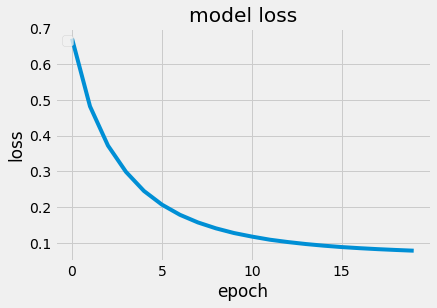

In [164]:
import matplotlib.pyplot as plt

def plot_hist(hist):
# summarize history for loss
    fig, ax = plt.subplots()  # create figure & 1 axis

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])

plot_hist(hist)

In [165]:
# Predict new Matrix Interactions
# set score zero on visualized games
# because we only want to predict the scores of those games that users do not have interactions before f(x)

new_matrix = model.predict(X) * (X == 0)

In [166]:
# converting the reconstructed matrix back to a Pandas dataframe
new_users_items_matrix = pd.DataFrame(new_matrix, 
                                      columns = users_items_matrix.columns, 
                                      index = users_items_matrix.index)
new_users_items_matrix

song_id,'Till I Collapse,(Don't Fear) The Reaper,(Sittin' On) The Dock Of The Bay,...Baby One More Time,21 Guns,40 Day Dream,5 Years Time,99 Problems,99 Red Balloons,A Case Of You,...,You Oughta Know,You Really Got Me,You and I,You're Beautiful,"You're Gonna Go Far, Kid",Young And Beautiful,"Young, Wild & Free (feat. Bruno Mars)",Zero,i,m.A.A.d city
user_id,,,,,,,,,,,,,,,,,,,,,
00287ecf491882a40ff34b0fd75a5b16,0.015320,0.000000,0.164271,0.138707,0.226947,-0.043361,0.032313,0.096362,0.098397,0.022693,...,0.028640,0.088879,0.042843,0.189864,0.041546,0.036145,0.208487,0.123217,0.096272,0.126417
00526df8fabfb8c8605f180ed1880754,0.046898,0.082366,0.068454,0.073047,0.168365,-0.034598,0.052474,0.000000,0.031678,0.082495,...,0.050673,-0.024568,0.020682,0.000000,0.120900,0.179599,0.115970,-0.012707,0.059201,-0.093357
00909b16e60501d9da9acf7bd2c5b00d,0.037072,0.061092,0.052462,-0.049366,0.028435,0.061750,0.061909,-0.003226,0.057996,0.064049,...,0.220424,0.258107,-0.056499,0.010915,-0.070886,0.012515,-0.021492,0.035851,-0.063784,-0.003590
00ba6890ed516e47967114c2f75bbe35,0.001953,0.075448,0.154656,0.024144,0.036541,0.026672,0.116699,0.142787,0.000000,-0.016945,...,-0.026095,0.151655,0.129800,0.099770,0.103331,0.025540,-0.001046,0.101732,0.102521,0.128018
00be8fa9d10f6318156fa753857597cf,-0.025337,-0.007808,0.000000,-0.017221,-0.020558,0.111988,0.093956,0.054635,0.041965,0.089196,...,-0.044613,0.230249,0.078272,0.028020,0.105598,0.071920,0.014103,0.000000,0.071332,0.085910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff02074397d6385f122f36cc11372fc6,0.083360,0.007659,0.093059,0.142530,0.145480,0.020758,0.086313,0.264596,0.079109,0.051121,...,0.083392,0.126181,0.055916,-0.082753,0.169320,0.064052,0.056035,0.000000,0.074188,0.103748
ff07dd0a6facfba39bca491ec9dd5068,-0.024672,0.117558,0.151565,0.185607,-0.022942,0.056522,0.092871,0.037417,0.174238,0.077892,...,0.162743,0.102022,0.012265,0.118641,0.111805,0.000000,0.037949,0.193003,0.138075,-0.004376
ff6a160f76014ae59888eab018f03375,0.185843,-0.042626,0.030503,0.136488,0.008185,0.067225,0.019533,0.178455,0.000000,0.104113,...,-0.078770,-0.083027,0.000000,0.073029,0.046710,0.000000,0.133656,0.164093,0.071368,0.137101


In [167]:
user_rec_name_aec_df = new_users_items_matrix.apply(lambda x: x.nlargest(num_recommendation_aec).index.tolist(), axis=1)
user_rec_score_aec_df = new_users_items_matrix.apply(lambda x: x.nlargest(num_recommendation_aec).tolist(), axis=1)
user_rec_aec_df = pd.concat([user_rec_name_aec_df, user_rec_score_aec_df], axis=1)
user_rec_aec_df

,0,1
user_id,,
00287ecf491882a40ff34b0fd75a5b16,"[Mr. Jones, Everybody Wants To Rule The World,...","[0.29025667905807495, 0.26648014783859253, 0.2..."
00526df8fabfb8c8605f180ed1880754,"[I Will Always Love You, Last Friday Night (T....","[0.32305166125297546, 0.31120941042900085, 0.3..."
00909b16e60501d9da9acf7bd2c5b00d,"[Have Yourself A Merry Little Christmas, You R...","[0.2765111029148102, 0.2581065893173218, 0.253..."
00ba6890ed516e47967114c2f75bbe35,"[Iron Man, Shiver, I Heard It Through The Grap...","[0.27626487612724304, 0.2729213237762451, 0.26..."
00be8fa9d10f6318156fa753857597cf,"[Happiness, Super Bass, Are You Gonna Go My Wa...","[0.24998876452445984, 0.24020056426525116, 0.2..."
...,...,...
ff02074397d6385f122f36cc11372fc6,"[Pieces, 99 Problems, Speed Of Sound, Beyond, ...","[0.28699010610580444, 0.26459571719169617, 0.2..."
ff07dd0a6facfba39bca491ec9dd5068,"[True, I Will Survive, Wicked Game, Hold the L...","[0.33376622200012207, 0.31977006793022156, 0.2..."
ff6a160f76014ae59888eab018f03375,"[Applause, Thinking About You, Love Lockdown, ...","[0.3212060332298279, 0.29091012477874756, 0.27..."


In [168]:
# combine the prediction and actual for test data
df_evaluation_aec =pd.concat([test_df,user_rec_aec_df], axis=1,ignore_index=False)
df_evaluation_aec =df_evaluation_aec[['song_id',0]]
df_evaluation_aec.columns=['actual','prediction']
df_evaluation_aec

,actual,prediction
user_id,,
00287ecf491882a40ff34b0fd75a5b16,"[I Don't Care, The High Road, The Way It Is, T...","[Mr. Jones, Everybody Wants To Rule The World,..."
00526df8fabfb8c8605f180ed1880754,"[This Is How We Do, Rock Your Body, Hide And S...","[I Will Always Love You, Last Friday Night (T...."
00909b16e60501d9da9acf7bd2c5b00d,"[River, The Sound of Silence, Mr. Tambourine M...","[Have Yourself A Merry Little Christmas, You R..."
00ba6890ed516e47967114c2f75bbe35,"[Disarm, Punching In A Dream, Clint Eastwood, ...","[Iron Man, Shiver, I Heard It Through The Grap..."
00be8fa9d10f6318156fa753857597cf,"[The Fear, Young And Beautiful, Stand By Me, N...","[Happiness, Super Bass, Are You Gonna Go My Wa..."
...,...,...
ff02074397d6385f122f36cc11372fc6,"[I Need You, Under Pressure, Bliss, Hotel Cali...","[Pieces, 99 Problems, Speed Of Sound, Beyond, ..."
ff07dd0a6facfba39bca491ec9dd5068,"[Habits (Stay High), Marry You, High And Dry, ...","[True, I Will Survive, Wicked Game, Hold the L..."
ff6a160f76014ae59888eab018f03375,"[Blue Jeans, You Make Me, Say My Name, I Follo...","[Applause, Thinking About You, Love Lockdown, ..."


## Content Based Model

In [169]:
# Read features of songs from another dataset
song_feature = pd.read_csv('spotify_audio_feature.csv', index_col = 0)
song_feature.drop(['type','id','uri','track_href','analysis_url'],axis=1, inplace = True)

# Numerical Variable: Standardization
categorical_variables = ['track','mode']
feature_scale = [feature for feature in song_feature.columns if feature not in categorical_variables]

scaler=StandardScaler()
scaled_data = pd.concat([song_feature[categorical_variables].reset_index(drop=True),
                         pd.DataFrame(scaler.fit_transform(song_feature[feature_scale]), columns=feature_scale)], 
                        axis = 1)

# Categorical Variable: Get Dummy
processed_data = pd.get_dummies(scaled_data, columns=["mode"])
processed_data

,track,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,mode_0.0,mode_1.0
0,Destiny,1.226065,0.177037,0.502484,-0.030459,0.309446,1.809203,-0.289951,0.866750,1.588725,-0.300255,-0.228394,0.17076,1,0
1,The Truth,-0.587105,-0.329631,1.056649,0.526137,-0.642281,0.008382,-0.289936,-0.488668,-0.512797,0.707443,0.166440,0.17076,0,1
2,Digital Love,0.335057,0.071098,1.056649,-0.269772,-0.553390,-0.640752,4.884942,1.164800,0.109721,0.073105,1.147993,0.17076,0,1
3,Fall,0.416058,0.393523,0.779567,0.647852,4.789554,-0.288265,-0.289951,-0.275775,-0.291365,-1.095674,-0.065945,0.17076,1,0
4,Finale,-0.051254,0.840312,-1.437092,0.953556,-0.361385,0.786644,-0.287927,-0.055786,0.911893,0.879728,-2.061695,0.17076,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,The Way It Is,-0.051254,0.186249,0.502484,-1.248898,-0.618577,1.310138,0.050864,-0.233197,0.113899,-0.397237,1.093116,0.17076,0,1
1331,Mr. Saxobeat - Radio Edit,0.883369,1.273282,1.610814,0.819489,-0.342422,-0.711947,-0.288530,-0.268679,1.162571,0.152398,-0.508735,0.17076,1,0
1332,I Don't Know,0.017285,0.743584,-1.160010,0.416002,-0.206122,1.292689,-0.289951,-0.417704,0.870113,0.742025,-0.308746,0.17076,0,1
1333,Little Drummer Boy,0.764984,-1.094239,0.779567,-0.229115,-0.526130,0.238719,-0.289522,-0.720721,0.510807,0.395026,0.438737,0.17076,0,1


In [170]:
song_features_without_id = processed_data.copy()
song_features_without_id.drop('track', inplace=True, axis=1)

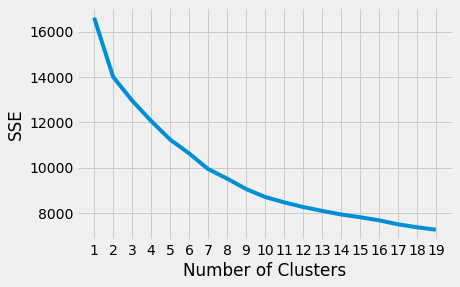

In [171]:
from sklearn.cluster import KMeans

# Look for best number of clusters
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(song_features_without_id)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [172]:
# Choose the best number of clusters and label songs
kmeans = KMeans(n_clusters=13, random_state = 42)
kmeans.fit(song_features_without_id)

processed_data['cluster_label'] = kmeans.labels_
processed_data['cluster_label'].value_counts(ascending=True)

5       8
8      13
10     51
0      54
11     86
2     100
7     102
12    103
4     117
6     136
9     159
1     180
3     226
Name: cluster_label, dtype: int64

In [173]:
processed_data

,track,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,mode_0.0,mode_1.0,cluster_label
0,Destiny,1.226065,0.177037,0.502484,-0.030459,0.309446,1.809203,-0.289951,0.866750,1.588725,-0.300255,-0.228394,0.17076,1,0,3
1,The Truth,-0.587105,-0.329631,1.056649,0.526137,-0.642281,0.008382,-0.289936,-0.488668,-0.512797,0.707443,0.166440,0.17076,0,1,6
2,Digital Love,0.335057,0.071098,1.056649,-0.269772,-0.553390,-0.640752,4.884942,1.164800,0.109721,0.073105,1.147993,0.17076,0,1,10
3,Fall,0.416058,0.393523,0.779567,0.647852,4.789554,-0.288265,-0.289951,-0.275775,-0.291365,-1.095674,-0.065945,0.17076,1,0,7
4,Finale,-0.051254,0.840312,-1.437092,0.953556,-0.361385,0.786644,-0.287927,-0.055786,0.911893,0.879728,-2.061695,0.17076,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,The Way It Is,-0.051254,0.186249,0.502484,-1.248898,-0.618577,1.310138,0.050864,-0.233197,0.113899,-0.397237,1.093116,0.17076,0,1,6
1331,Mr. Saxobeat - Radio Edit,0.883369,1.273282,1.610814,0.819489,-0.342422,-0.711947,-0.288530,-0.268679,1.162571,0.152398,-0.508735,0.17076,1,0,3
1332,I Don't Know,0.017285,0.743584,-1.160010,0.416002,-0.206122,1.292689,-0.289951,-0.417704,0.870113,0.742025,-0.308746,0.17076,0,1,1
1333,Little Drummer Boy,0.764984,-1.094239,0.779567,-0.229115,-0.526130,0.238719,-0.289522,-0.720721,0.510807,0.395026,0.438737,0.17076,0,1,6


In [174]:
# Enrich train data with song's cluster label
song_label = {}
for i,j in zip(processed_data.track, processed_data.cluster_label):
    song_label[i] = j

spotify_train['label'] = spotify_train['song_id'].apply(lambda x: song_label[x])
spotify_train

,user_id,song_id,rating,label
0,00287ecf491882a40ff34b0fd75a5b16,Nothing Compares 2 U,1,2
1,00287ecf491882a40ff34b0fd75a5b16,About A Girl,1,9
2,00287ecf491882a40ff34b0fd75a5b16,Wherever You Will Go,1,1
3,00287ecf491882a40ff34b0fd75a5b16,Wild World,1,12
4,00287ecf491882a40ff34b0fd75a5b16,Video Killed The Radio Star,1,12
...,...,...,...,...
228070,ff83b4f72197d1c04338887bbebb9ce1,Ms. Jackson,1,7
228071,ff83b4f72197d1c04338887bbebb9ce1,Move,1,1
228072,ff83b4f72197d1c04338887bbebb9ce1,My Hero,1,2
228073,ff83b4f72197d1c04338887bbebb9ce1,Dumb,1,12


In [175]:
# Store each user's liked songs
liked_songs = {}
for i in users_items_matrix.index.tolist():
    temp_df = spotify_train.loc[spotify_train.user_id == i]
    liked_songs[i] = set(temp_df.song_id.values)
liked_songs

{'00287ecf491882a40ff34b0fd75a5b16': {"(Don't Fear) The Reaper",
  'About A Girl',
  'All Night Long',
  'All Star',
  'Anaconda',
  'Apologize',
  'Back To Black',
  'Black Betty',
  'Black Widow',
  'Blue Monday',
  'Bring Me To Life',
  'Broken Wings',
  'Buddy Holly',
  "Can't Get You Out Of My Head",
  'Celebration',
  'Close To Me',
  'Complicated',
  "DJ Got Us Fallin' in Love",
  'Dancing Queen',
  'Danger Zone',
  "Don't Stop The Music",
  'Down Under',
  'Drops of Jupiter',
  'Everybody',
  'Everytime',
  'Feel The Love - feat. John Newman',
  'Get Ur Freak On',
  'Give It Up',
  'Give Me Everything',
  'Gonna Make You Sweat (Everybody Dance Now)',
  'Groove Is In The Heart',
  'Hold the Line',
  'Hush',
  'I Try',
  'I Wanna Go',
  'Ice Ice Baby',
  'In Too Deep',
  'In Your Eyes',
  'Infinity',
  'Insomnia',
  'It Takes Two',
  'Jump Around',
  'Just Dance',
  'Keep Your Head Up',
  'Layla',
  "Let's Stay Together",
  'Lovely Day',
  'Machine Gun',
  'Milkshake',
  'More Th

In [176]:
# Store each user's most liked labels in train set
most_liked_labels = {}
for i in users_items_matrix.index.tolist():
    most_liked_labels[i] = spotify_train.loc[spotify_train.user_id == i].label.value_counts(ascending=False).index[:2].values
most_liked_labels

{'00287ecf491882a40ff34b0fd75a5b16': array([3, 1], dtype=int64),
 '00526df8fabfb8c8605f180ed1880754': array([3, 1], dtype=int64),
 '00909b16e60501d9da9acf7bd2c5b00d': array([4, 3], dtype=int64),
 '00ba6890ed516e47967114c2f75bbe35': array([3, 9], dtype=int64),
 '00be8fa9d10f6318156fa753857597cf': array([1, 3], dtype=int64),
 '00c58a505e97067cf582e2cfac4e3a04': array([1, 3], dtype=int64),
 '00c64863e80532f599ebdd6e3e127a64': array([3, 1], dtype=int64),
 '00c7daf538b54958e926e713d83f74e7': array([3, 6], dtype=int64),
 '00ff8855fe1fc87e2a7b3a10fdc29a88': array([7, 1], dtype=int64),
 '010096e20f6d97884d2e9e7fcc9a3576': array([3, 2], dtype=int64),
 '012db3e7cbd92055288210776d30410c': array([3, 6], dtype=int64),
 '013563dd7de2dc6431a3517d5ccdbef0': array([3, 7], dtype=int64),
 '013a2d23b71c5d4c6be4367e45c1241e': array([3, 1], dtype=int64),
 '0145d31381bba129b9c5dca514e8777b': array([3, 4], dtype=int64),
 '014cbb4fca17d60636275b13377cab6d': array([3, 1], dtype=int64),
 '01957b56d1ffbbe29f527f0

In [177]:
# Loop through all users and generate recommendation
# Calculate the distance between each data point and their cluster center
processed_data['distance_from_center'] = 0
data_dist = kmeans.transform(song_features_without_id)
for i in range(len(data_dist)):
    processed_data.loc[i,'distance_from_center'] = min(data_dist[i])

# Create a dictionary to store recommendation results for all users
rec_result = {}

for i in users_items_matrix.index.tolist():
    rec_result[i] = [] # Initialise the rec result for this user
    for j in most_liked_labels[i]: # Loop through the top cluster labels this user likes
        temp_df = processed_data.loc[processed_data.cluster_label == j] # Find all songs from this cluster
        temp_df.sort_values(by=['distance_from_center'])
        count = 0 
        distance_from_center = {}
        for k in temp_df.track.values: # For each song
            if k not in liked_songs[i]: # Check if it's liked before by this user in train set
                rec_result[i].append(k) #Append the top 5 songs from this cluster to this user's reco list
                count = count + 1
                if count >= 5:
                    break

In [178]:
print(rec_result[users_items_matrix.index.tolist()[0]])

['Destiny', 'Harder Better Faster Stronger', 'Oh Yeah', 'Honey', 'Are You Gonna Go My Way', 'Finale', 'B.Y.O.B.', 'By The Way', "Can't Stop", "I Was Made For Lovin' You"]


In [179]:
# Covert rec_result from dictionary to dataframe
user_rec_cm_df = pd.DataFrame.from_dict(rec_result,orient='index')
user_rec_cm_df['prediction']= user_rec_cm_df.values.tolist()

# combine the prediction and actual for test data
df_evaluation_cm =pd.concat([test_df,user_rec_cm_df], axis=1, ignore_index=False)
df_evaluation_cm =df_evaluation_cm[['song_id','prediction']]
df_evaluation_cm.columns=['actual','prediction']
df_evaluation_cm

,actual,prediction
00287ecf491882a40ff34b0fd75a5b16,"[I Don't Care, The High Road, The Way It Is, T...","[Destiny, Harder Better Faster Stronger, Oh Ye..."
00526df8fabfb8c8605f180ed1880754,"[This Is How We Do, Rock Your Body, Hide And S...","[Destiny, Harder Better Faster Stronger, Oh Ye..."
00909b16e60501d9da9acf7bd2c5b00d,"[River, The Sound of Silence, Mr. Tambourine M...","[Who Are You, Witchcraft, Englishman In New Yo..."
00ba6890ed516e47967114c2f75bbe35,"[Disarm, Punching In A Dream, Clint Eastwood, ...","[Destiny, Harder Better Faster Stronger, Oh Ye..."
00be8fa9d10f6318156fa753857597cf,"[The Fear, Young And Beautiful, Stand By Me, N...","[Finale, B.Y.O.B., Can't Stop, I Was Made For ..."
...,...,...
ff02074397d6385f122f36cc11372fc6,"[I Need You, Under Pressure, Bliss, Hotel Cali...","[Fall, Rapture, Beat It - Single Version, La G..."
ff07dd0a6facfba39bca491ec9dd5068,"[Habits (Stay High), Marry You, High And Dry, ...","[Destiny, Harder Better Faster Stronger, Oh Ye..."
ff6a160f76014ae59888eab018f03375,"[Blue Jeans, You Make Me, Say My Name, I Follo...","[Destiny, Harder Better Faster Stronger, Oh Ye..."
ff7b038df18cc33b829eafcc01562b02,"[The Edge Of Glory, Black And Yellow, Push It,...","[Destiny, Harder Better Faster Stronger, Oh Ye..."


# Evaluation

## Hit ratio

In [180]:
def HitRatio(y_pred, y_test):
    hits=0
    total=0

    for i, y_true in enumerate(y_test):
        hit = False
        for predictions in y_pred.take(indices = [i]):
            for pred in predictions:
                if pred in y_true:
                    hit=True
                    break
        if (hit):
            hits+=1
        
        total+=1

    return hits/total

In [181]:
hr_nmf = HitRatio(df_evaluation_nmf['prediction'], df_evaluation_nmf['actual'])
hr_nmf

0.5521305530371714

In [182]:
hr_svd = HitRatio(df_evaluation_svd['prediction'], df_evaluation_svd['actual'])
hr_svd

0.5738893925657298

In [183]:
hr_cf = HitRatio(df_evaluation_cf['prediction'], df_evaluation_cf['actual'])
hr_cf

0.6595648232094289

In [184]:
hr_aec = HitRatio(df_evaluation_aec['prediction'], df_evaluation_aec['actual'])
hr_aec

0.47506799637352676

In [185]:
hr_cm = HitRatio(df_evaluation_cm['prediction'], df_evaluation_cm['actual'])
hr_cm

0.2184950135992747

## NDCG

In [186]:
def get_implict_matrix(rec_items, test_set):
    rel_matrix = [[0] * rec_items.shape[1] for _ in range(rec_items.shape[0])]
    for user in range(len(test_set)):
        for index, item in enumerate(rec_items[user]):
            if item in test_set[user]:
                rel_matrix[user][index] = 1
    return np.array(rel_matrix)


def DCG(items):
    return np.sum(items / np.log(np.arange(2, len(items) + 2)))


def nDCG(rec_items, test_set):
    assert rec_items.shape[0] == len(test_set)

    rel_matrix = get_implict_matrix(rec_items, test_set)
    ndcgs = []
    for user in range(len(test_set)):
        rels = rel_matrix[user]
        dcg = DCG(rels)
        idcg = DCG(sorted(rels, reverse=True))
        ndcg = dcg / idcg if idcg != 0 else 0
        ndcgs.append(ndcg)
    return ndcgs

In [187]:
# group by all the predictions and actual into one row
df_eval_nmf = df_evaluation_nmf.copy()
df_eval_nmf['number'] = 1
df_eval_nmf = df_eval_nmf.groupby('number').agg(list)

In [188]:
# calculate overall ndcg
ndcgs_nmf = nDCG(np.array(df_eval_nmf['prediction'][1]), df_eval_nmf['actual'][1])
overall_ndcg_nmf = sum(ndcgs_nmf) / len(ndcgs_nmf)
overall_ndcg_nmf

0.2883619779406856

In [189]:
# group by all the predictions and actual into one row
df_eval_svd = df_evaluation_svd.copy()
df_eval_svd['number'] = 1
df_eval_svd = df_eval_svd.groupby('number').agg(list)

In [190]:
# calculate overall ndcg
ndcgs_svd = nDCG(np.array(df_eval_svd['prediction'][1]), df_eval_svd['actual'][1])
overall_ndcg_svd = sum(ndcgs_svd) / len(ndcgs_svd)
overall_ndcg_svd

0.29850889772324496

In [191]:
# group by all the predictions and actual into one row
df_eval_cf = df_evaluation_cf.copy()
df_eval_cf['number'] = 1
df_eval_cf = df_eval_cf.groupby('number').agg(list)

In [192]:
# calculate overall ndcg
ndcgs_cf = nDCG(np.array(df_eval_cf['prediction'][1]), df_eval_cf['actual'][1])
overall_ndcg_cf = sum(ndcgs_cf) / len(ndcgs_cf)
overall_ndcg_cf

0.37053741299721443

In [193]:
# group by all the predictions and actual into one row
df_eval_aec = df_evaluation_aec.copy()
df_eval_aec['number'] = 1
df_eval_aec = df_eval_aec.groupby('number').agg(list)

In [194]:
# calculate overall ndcg
ndcgs_aec = nDCG(np.array(df_eval_aec['prediction'][1]), df_eval_aec['actual'][1])
overall_ndcg_aec = sum(ndcgs_aec) / len(ndcgs_aec)
overall_ndcg_aec

0.249387192427553

In [195]:
# group by all the predictions and actual into one row
df_eval_cm = df_evaluation_cm.copy()
df_eval_cm['number'] = 1
df_eval_cm = df_eval_cm.groupby('number').agg(list)

In [196]:
# calculate overall ndcg
ndcgs_cm = nDCG(np.array(df_eval_cm['prediction'][1]), df_eval_cm['actual'][1])
overall_ndcg_cm = sum(ndcgs_cm) / len(ndcgs_cm)
overall_ndcg_cm

0.10006033850528212

# Combined Model

In [197]:
# number of recommendation for new user or new items
num_recommendation_comb = 10

In [198]:
def normalize_score_nmf(x):
    normalized_score = []
    for i in x:
        if max(x)-min(x)==0:
            normalized_score.append(hr_nmf)
        else:
            normalized_score.append((i-min(x))/(max(x)-min(x))*hr_nmf)
    return normalized_score

user_rec_nmf = user_rec_nmf_df.copy()
user_rec_nmf[1] = user_rec_nmf_df[1].apply(normalize_score_nmf)
user_rec_nmf

,0,1
user_id,,
00287ecf491882a40ff34b0fd75a5b16,"[Like A Prayer, Summer Of '69, I Will Always L...","[0.5521305530371714, 0.5489849399587722, 0.492..."
00526df8fabfb8c8605f180ed1880754,"[Where Have You Been, Man Down, Disturbia, Thi...","[0.5521305530371714, 0.29729567227976045, 0.29..."
00909b16e60501d9da9acf7bd2c5b00d,"[Prologue, Somewhere, Overture, Come On, Silen...","[0.5521305530371714, 0.47576172029266933, 0.45..."
00ba6890ed516e47967114c2f75bbe35,"[Requiem, Come Back, Good Enough, Salvation, D...","[0.5521305530371714, 0.5017394607768151, 0.457..."
00be8fa9d10f6318156fa753857597cf,"[Stormy Weather, Walk On By, Downtown, Twiligh...","[0.5521305530371714, 0.469045554891411, 0.3513..."
...,...,...
ff02074397d6385f122f36cc11372fc6,"[Bohemian Like You, Porcelain, Digital Love, G...","[0.5521305530371714, 0.5131860172469394, 0.505..."
ff07dd0a6facfba39bca491ec9dd5068,"[Fields Of Gold, You Can't Hurry Love, Jump - ...","[0.5521305530371714, 0.38085825186634437, 0.35..."
ff6a160f76014ae59888eab018f03375,"[Faded, Suit & Tie featuring JAY Z, Best I Eve...","[0.5521305530371714, 0.4361268149032878, 0.152..."


In [199]:
def normalize_score_svd(x):
    normalized_score = []
    for i in x:
        if max(x)-min(x)==0:
            normalized_score.append(hr_svd)
        else:
            normalized_score.append((i-min(x))/(max(x)-min(x))*hr_svd)
    return normalized_score

user_rec_svd = user_rec_svd_df.copy()
user_rec_svd[1] = user_rec_svd_df[1].apply(normalize_score_svd)
user_rec_svd

,0,1
user_id,,
00287ecf491882a40ff34b0fd75a5b16,"[Beat It - Single Version, What Is Love, Ordin...","[0.5738893925657298, 0.32689257829919116, 0.20..."
00526df8fabfb8c8605f180ed1880754,"[This Is How We Do, Story of My Life, When I W...","[0.5738893925657298, 0.4415819043612593, 0.437..."
00909b16e60501d9da9acf7bd2c5b00d,"[River, The Promise, Amazing Grace, All I Want...","[0.5738893925657298, 0.4963108426245014, 0.348..."
00ba6890ed516e47967114c2f75bbe35,"[Sober, Salvation, Breakout, Saturday Night, G...","[0.5738893925657298, 0.5688309213911373, 0.546..."
00be8fa9d10f6318156fa753857597cf,"[Lovesong, Missing, The Walk, Chicago, Come Aw...","[0.5738893925657298, 0.3794864096425459, 0.282..."
...,...,...
ff02074397d6385f122f36cc11372fc6,"[Supersonic, Fight For Your Right, Peaches, Fi...","[0.5738893925657298, 0.5562239282932768, 0.334..."
ff07dd0a6facfba39bca491ec9dd5068,"[Mad World, Wicked Game, The Final Countdown, ...","[0.5738893925657298, 0.49791120381824305, 0.32..."
ff6a160f76014ae59888eab018f03375,"[Habits (Stay High), Love Never Felt so Good, ...","[0.5738893925657298, 0.5299400063865494, 0.204..."


In [200]:
def normalize_score_cf(x):
    normalized_score = []
    for i in x:
        if max(x)-min(x)==0:
            normalized_score.append(hr_cf)
        else:
            normalized_score.append((i-min(x))/(max(x)-min(x))*hr_cf)
    return normalized_score

user_rec_cf = user_rec_cf_df.copy()
user_rec_cf[1] = user_rec_cf_df[1].apply(normalize_score_cf)
user_rec_cf

,0,1
user_id,,
00287ecf491882a40ff34b0fd75a5b16,"[Beat It - Single Version, Livin' On A Prayer,...","[0.6595648232094289, 0.6595648232094289, 0.659..."
00526df8fabfb8c8605f180ed1880754,"[Anaconda, Black Widow, I Got U, Shot me Down ...","[0.6595648232094289, 0.6595648232094289, 0.659..."
00909b16e60501d9da9acf7bd2c5b00d,"[Gloria, October, Overture, At Last, Georgia O...","[0.6595648232094289, 0.6595648232094289, 0.659..."
00ba6890ed516e47967114c2f75bbe35,"[Faith, About A Girl, Dig, Live It Up, Semi-Ch...","[0.6595648232094289, 0.15005308709578277, 0.15..."
00be8fa9d10f6318156fa753857597cf,"[Beyond, Civilization, Clint Eastwood, Have Yo...","[0.6595648232094289, 0.6595648232094289, 0.659..."
...,...,...
ff02074397d6385f122f36cc11372fc6,"[Fake Plastic Trees, Let Down, Paranoid Androi...","[0.6595648232094289, 0.6595648232094289, 0.659..."
ff07dd0a6facfba39bca491ec9dd5068,"[Everybody Hurts, Love Hurts, Sunshine Of Your...","[0.6595648232094289, 0.6595648232094289, 0.659..."
ff6a160f76014ae59888eab018f03375,"[Clique, Black Widow, Blue Jeans, Heart Skippe...","[0.6595648232094289, 0.0003428529191429244, 0...."


In [201]:
def normalize_score_aec(x):
    normalized_score = []
    for i in x:
        if max(x)-min(x)==0:
            normalized_score.append(hr_aec)
        else:
            normalized_score.append((i-min(x))/(max(x)-min(x))*hr_aec)
    return normalized_score

user_rec_aec = user_rec_aec_df.copy()
user_rec_aec[1] = user_rec_aec_df[1].apply(normalize_score_aec)
user_rec_aec

,0,1
user_id,,
00287ecf491882a40ff34b0fd75a5b16,"[Mr. Jones, Everybody Wants To Rule The World,...","[0.47506799637352676, 0.30947844115370515, 0.2..."
00526df8fabfb8c8605f180ed1880754,"[I Will Always Love You, Last Friday Night (T....","[0.47506799637352676, 0.3922972081852276, 0.33..."
00909b16e60501d9da9acf7bd2c5b00d,"[Have Yourself A Merry Little Christmas, You R...","[0.47506799637352676, 0.3601295611159079, 0.32..."
00ba6890ed516e47967114c2f75bbe35,"[Iron Man, Shiver, I Heard It Through The Grap...","[0.47506799637352676, 0.44672582099324604, 0.3..."
00be8fa9d10f6318156fa753857597cf,"[Happiness, Super Bass, Are You Gonna Go My Wa...","[0.47506799637352676, 0.3098292618800072, 0.23..."
...,...,...
ff02074397d6385f122f36cc11372fc6,"[Pieces, 99 Problems, Speed Of Sound, Beyond, ...","[0.47506799637352676, 0.2412315363741847, 0.23..."
ff07dd0a6facfba39bca491ec9dd5068,"[True, I Will Survive, Wicked Game, Hold the L...","[0.47506799637352676, 0.38937708139749, 0.1826..."
ff6a160f76014ae59888eab018f03375,"[Applause, Thinking About You, Love Lockdown, ...","[0.47506799637352676, 0.29465248047955594, 0.1..."


In [202]:
user_rec_comb_df = user_rec_aec_df.copy()

for u in users_items_matrix.index.tolist():
    nmf_df = pd.DataFrame(zip(user_rec_nmf_df.loc[u,0], user_rec_nmf_df.loc[u,1]))
    svd_df = pd.DataFrame(zip(user_rec_svd_df.loc[u,0], user_rec_svd_df.loc[u,1]))
    cf_df = pd.DataFrame(zip(user_rec_cf_df.loc[u,0], user_rec_cf_df.loc[u,1]))
    aec_df = pd.DataFrame(zip(user_rec_aec_df.loc[u,0], user_rec_aec_df.loc[u,1]))
    comb_df = pd.concat([nmf_df, svd_df, cf_df, aec_df])
    comb_df = comb_df.groupby(0).sum()[[1]]
    comb_df = comb_df.sort_values(by=1, ascending=False)
    comb_df = comb_df.iloc[:num_recommendation_comb, :]
    user_rec_comb_df.loc[u,0] = comb_df.index.tolist()
    user_rec_comb_df.loc[u,1] = comb_df[1].tolist()

user_rec_comb_df

,0,1
user_id,,
00287ecf491882a40ff34b0fd75a5b16,"[Beat It - Single Version, What Is Love, U Can...","[2.3883803098832432, 1.8163991727468976, 1.624..."
00526df8fabfb8c8605f180ed1880754,"[This Is How We Do, Come & Get It, I Cry, Wher...","[1.8833502868398577, 1.829271110751371, 1.7927..."
00909b16e60501d9da9acf7bd2c5b00d,"[Amazing Grace, River, Overture, Prologue, Som...","[2.155840994726054, 1.9012777862295596, 1.5550..."
00ba6890ed516e47967114c2f75bbe35,"[Salvation, Good Enough, Hush, Waiting, Escape...","[1.8038825360873925, 1.7796040359768892, 1.746..."
00be8fa9d10f6318156fa753857597cf,"[Stormy Weather, Walk On By, Downtown, Twiligh...","[1.7870638809392991, 0.962304106732807, 0.9565..."
...,...,...
ff02074397d6385f122f36cc11372fc6,"[Digital Love, Paranoid Android, Bohemian Like...","[1.6737689485459817, 1.3865108356345894, 0.923..."
ff07dd0a6facfba39bca491ec9dd5068,"[The Final Countdown, Can't Take My Eyes Off Y...","[1.8167953757436122, 1.8117585442386992, 1.795..."
ff6a160f76014ae59888eab018f03375,"[Faded, Suit & Tie featuring JAY Z, Wicked Gam...","[2.0376462178702712, 1.804991515862746, 1.7390..."


In [203]:
# combine the prediction and actual for test data
df_evaluation_comb =pd.concat([test_df,user_rec_comb_df], axis=1,ignore_index=False)
df_evaluation_comb =df_evaluation_comb[['song_id',0]]
df_evaluation_comb.columns=['actual','prediction']
df_evaluation_comb

,actual,prediction
user_id,,
00287ecf491882a40ff34b0fd75a5b16,"[I Don't Care, The High Road, The Way It Is, T...","[Beat It - Single Version, What Is Love, U Can..."
00526df8fabfb8c8605f180ed1880754,"[This Is How We Do, Rock Your Body, Hide And S...","[This Is How We Do, Come & Get It, I Cry, Wher..."
00909b16e60501d9da9acf7bd2c5b00d,"[River, The Sound of Silence, Mr. Tambourine M...","[Amazing Grace, River, Overture, Prologue, Som..."
00ba6890ed516e47967114c2f75bbe35,"[Disarm, Punching In A Dream, Clint Eastwood, ...","[Salvation, Good Enough, Hush, Waiting, Escape..."
00be8fa9d10f6318156fa753857597cf,"[The Fear, Young And Beautiful, Stand By Me, N...","[Stormy Weather, Walk On By, Downtown, Twiligh..."
...,...,...
ff02074397d6385f122f36cc11372fc6,"[I Need You, Under Pressure, Bliss, Hotel Cali...","[Digital Love, Paranoid Android, Bohemian Like..."
ff07dd0a6facfba39bca491ec9dd5068,"[Habits (Stay High), Marry You, High And Dry, ...","[The Final Countdown, Can't Take My Eyes Off Y..."
ff6a160f76014ae59888eab018f03375,"[Blue Jeans, You Make Me, Say My Name, I Follo...","[Faded, Suit & Tie featuring JAY Z, Wicked Gam..."


In [204]:
hr_comb = HitRatio(df_evaluation_comb['prediction'], df_evaluation_comb['actual'])
hr_comb

0.5689029918404351

In [205]:
# group by all the predictions and actual into one row
df_eval_comb = df_evaluation_comb.copy()
df_eval_comb['number'] = 1
df_eval_comb = df_eval_comb.groupby('number').agg(list)

In [206]:
# calculate overall ndcg
ndcgs_comb = nDCG(np.array(df_eval_comb['prediction'][1]), df_eval_comb['actual'][1])
overall_ndcg_comb = sum(ndcgs_comb) / len(ndcgs_comb)
overall_ndcg_comb

0.32265476411779254

# Cold Start Problem

In [207]:
# although the performance of content base model is not very good and not included in combined model
# it is suitable to solve cold start problem
# by clustering songs with their features, 
# those songs closed to centroids of their cluster can be recommended to new users to get their tastes
# new songs could be assigned to clusters and recommended to users who like this cluster the most

## New User

In [208]:
processed_data

,track,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,mode_0.0,mode_1.0,cluster_label,distance_from_center
0,Destiny,1.226065,0.177037,0.502484,-0.030459,0.309446,1.809203,-0.289951,0.866750,1.588725,-0.300255,-0.228394,0.17076,1,0,3,2.921703
1,The Truth,-0.587105,-0.329631,1.056649,0.526137,-0.642281,0.008382,-0.289936,-0.488668,-0.512797,0.707443,0.166440,0.17076,0,1,6,1.536253
2,Digital Love,0.335057,0.071098,1.056649,-0.269772,-0.553390,-0.640752,4.884942,1.164800,0.109721,0.073105,1.147993,0.17076,0,1,10,2.183111
3,Fall,0.416058,0.393523,0.779567,0.647852,4.789554,-0.288265,-0.289951,-0.275775,-0.291365,-1.095674,-0.065945,0.17076,1,0,7,2.562937
4,Finale,-0.051254,0.840312,-1.437092,0.953556,-0.361385,0.786644,-0.287927,-0.055786,0.911893,0.879728,-2.061695,0.17076,0,1,1,2.769086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,The Way It Is,-0.051254,0.186249,0.502484,-1.248898,-0.618577,1.310138,0.050864,-0.233197,0.113899,-0.397237,1.093116,0.17076,0,1,6,2.367183
1331,Mr. Saxobeat - Radio Edit,0.883369,1.273282,1.610814,0.819489,-0.342422,-0.711947,-0.288530,-0.268679,1.162571,0.152398,-0.508735,0.17076,1,0,3,1.588695
1332,I Don't Know,0.017285,0.743584,-1.160010,0.416002,-0.206122,1.292689,-0.289951,-0.417704,0.870113,0.742025,-0.308746,0.17076,0,1,1,2.232668
1333,Little Drummer Boy,0.764984,-1.094239,0.779567,-0.229115,-0.526130,0.238719,-0.289522,-0.720721,0.510807,0.395026,0.438737,0.17076,0,1,6,2.074130


In [209]:
df = processed_data[['track','cluster_label','distance_from_center']]
df = df.groupby('cluster_label').agg(list).sort_index()
df

,track,distance_from_center
cluster_label,,
0,"[Colours, First Of The Year (Equinox), If Only...","[3.53898758298352, 4.042090197300848, 1.428571..."
1,"[Finale, B.Y.O.B., By The Way, Can't Stop, I W...","[2.7690861008868493, 2.1347292999287277, 2.502..."
2,"[Porcelain, Thunder, (Don't Fear) The Reaper, ...","[2.7804864634963633, 1.5918674286290295, 1.899..."
3,"[Destiny, Harder Better Faster Stronger, Oh Ye...","[2.921702893925471, 2.2506724926765767, 1.6567..."
4,"[Who Are You, Witchcraft, Englishman In New Yo...","[4.65643607285239, 1.8475481161795293, 2.99079..."
5,"[Recover, Mountains, Ave Maria, Touch The Sky,...","[6.202526984190113, 2.4342554621665813, 2.7543..."
6,"[The Truth, Midnight, Again, Behind Blue Eyes,...","[1.5362526812436705, 2.0563532039279666, 2.003..."
7,"[Fall, Rapture, Beat It - Single Version, Coca...","[2.562936842997211, 2.9523690954149355, 3.3241..."
8,"[Nocturne, Overture, Nothing, Greensleeves, Th...","[5.169337101807533, 3.900607505120038, 4.03093..."


In [210]:
# find songs closed to every cluster center and recommend them to all new users
new_user_rec = []
min_index = 0
for i in range(len(df.index)):
    min_value = min(df['distance_from_center'][i])
    for index in range(len(df['track'][i])):
        if df['distance_from_center'][i][index] == min_value:
            min_index = index
    track = df['track'][i][min_index]
    new_user_rec.append(track)
new_user_rec

['If Only',
 'Just A Girl',
 'Simple Man',
 'Cool Kids',
 "I'm Gonna Be (500 Miles)",
 'Mountains',
 'Apologize',
 'Garden',
 'Lighthouse',
 "Sugar, We're Goin Down",
 'Gonna Make You Sweat (Everybody Dance Now)',
 'Saturday Night',
 'Sunshine Of Your Love']

## New Song

In [211]:
# assume we have a new song with following features
new_song_raw = pd.read_csv('spotify_audio_feature.csv', index_col = 0)
new_song_raw

,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Destiny,0.787,0.687,7.0,-7.468,0.0,0.1060,0.75000,0.000000,0.3000,0.884,113.962,audio_features,0hgLHFyN9u3WqkK2ofpuUX,spotify:track:0hgLHFyN9u3WqkK2ofpuUX,https://api.spotify.com/v1/tracks/0hgLHFyN9u3W...,https://api.spotify.com/v1/audio-analysis/0hgL...,213087.0,4.0
1,The Truth,0.496,0.577,9.0,-5.305,1.0,0.0257,0.23400,0.000002,0.1090,0.381,143.014,audio_features,25rV6ArwFMht49oONoqSLQ,spotify:track:25rV6ArwFMht49oONoqSLQ,https://api.spotify.com/v1/tracks/25rV6ArwFMht...,https://api.spotify.com/v1/audio-analysis/25rV...,238413.0,4.0
2,Digital Love,0.644,0.664,9.0,-8.398,1.0,0.0332,0.04800,0.867000,0.3420,0.530,124.726,audio_features,2VEZx7NWsZ1D0eJ4uv5Fym,spotify:track:2VEZx7NWsZ1D0eJ4uv5Fym,https://api.spotify.com/v1/tracks/2VEZx7NWsZ1D...,https://api.spotify.com/v1/audio-analysis/2VEZ...,301373.0,4.0
3,Fall,0.657,0.734,8.0,-4.832,0.0,0.4840,0.14900,0.000000,0.1390,0.434,91.030,audio_features,5SkRLpaGtvYPhw02vZhQQ9,spotify:track:5SkRLpaGtvYPhw02vZhQQ9,https://api.spotify.com/v1/tracks/5SkRLpaGtvYP...,https://api.spotify.com/v1/audio-analysis/5SkR...,223507.0,4.0
4,Finale,0.582,0.831,0.0,-3.644,1.0,0.0494,0.45700,0.000339,0.1700,0.722,147.981,audio_features,1fvc8FP8MUrIbHGYb4kF89,spotify:track:1fvc8FP8MUrIbHGYb4kF89,https://api.spotify.com/v1/tracks/1fvc8FP8MUrI...,https://api.spotify.com/v1/audio-analysis/1fvc...,95493.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,The Way It Is,0.582,0.689,7.0,-12.203,1.0,0.0277,0.60700,0.057100,0.1450,0.531,111.166,audio_features,6V50MyHPGhEmwYu0Wdyf0t,spotify:track:6V50MyHPGhEmwYu0Wdyf0t,https://api.spotify.com/v1/tracks/6V50MyHPGhEm...,https://api.spotify.com/v1/audio-analysis/6V50...,297853.0,4.0
1331,Mr. Saxobeat - Radio Edit,0.732,0.925,11.0,-4.165,0.0,0.0510,0.02760,0.000238,0.1400,0.782,127.012,audio_features,35V1v3MPs76nwlPfeK0oF9,spotify:track:35V1v3MPs76nwlPfeK0oF9,https://api.spotify.com/v1/tracks/35V1v3MPs76n...,https://api.spotify.com/v1/audio-analysis/35V1...,195105.0,4.0
1332,I Don't Know,0.593,0.810,1.0,-5.733,1.0,0.0625,0.60200,0.000000,0.1190,0.712,144.011,audio_features,3yOs8FffuG6hPbzQG9lIqV,spotify:track:3yOs8FffuG6hPbzQG9lIqV,https://api.spotify.com/v1/tracks/3yOs8FffuG6h...,https://api.spotify.com/v1/audio-analysis/3yOs...,207933.0,4.0
1333,Little Drummer Boy,0.713,0.411,8.0,-8.240,1.0,0.0355,0.30000,0.000072,0.0763,0.626,134.007,audio_features,7BvCDrlYwJ5D9RUqvvs3BT,spotify:track:7BvCDrlYwJ5D9RUqvvs3BT,https://api.spotify.com/v1/tracks/7BvCDrlYwJ5D...,https://api.spotify.com/v1/audio-analysis/7BvC...,255879.0,4.0


In [218]:
# randomly select numbers in dataset as input of new song features
new_song = ['new_song']
for i in range(18):
    new_song.append(new_song_raw.iloc[random.randint(0, len(new_song_raw)),i+1])
new_song_df = pd.DataFrame(new_song, index=new_song_raw.columns).T
new_song_df

,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,new_song,0.451,0.961,1.0,-8.627,0.0,0.0364,0.0011,0.537,0.104,0.668,170.814,audio_features,7sLpSWxQazJzDVG6YGzlVs,spotify:track:3avYqdwHKEq8beXbeWCKqJ,https://api.spotify.com/v1/tracks/503OTo2dSqe7...,https://api.spotify.com/v1/audio-analysis/5g3T...,182307.0,4.0


In [219]:
# create a dummy_song with different 'mode' from the new_song so we could get dummies properly
dummy_song_df = new_song_df.copy()
dummy_song_df.loc[:,'track'] = 'dummy_song'
dummy_song_df.loc[:,'mode'] = 1 - new_song_df.loc[:,'mode']
two_song_df = pd.concat([new_song_df, dummy_song_df], axis=0)
two_song_df

,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,new_song,0.451,0.961,1.0,-8.627,0.0,0.0364,0.0011,0.537,0.104,0.668,170.814,audio_features,7sLpSWxQazJzDVG6YGzlVs,spotify:track:3avYqdwHKEq8beXbeWCKqJ,https://api.spotify.com/v1/tracks/503OTo2dSqe7...,https://api.spotify.com/v1/audio-analysis/5g3T...,182307.0,4.0
0,dummy_song,0.451,0.961,1.0,-8.627,1.0,0.0364,0.0011,0.537,0.104,0.668,170.814,audio_features,7sLpSWxQazJzDVG6YGzlVs,spotify:track:3avYqdwHKEq8beXbeWCKqJ,https://api.spotify.com/v1/tracks/503OTo2dSqe7...,https://api.spotify.com/v1/audio-analysis/5g3T...,182307.0,4.0


In [220]:
# preprocess new song features
two_song_df.drop(['type','id','uri','track_href','analysis_url'],axis=1, inplace = True)

scaled_two_song_df = pd.concat([two_song_df[categorical_variables].reset_index(drop=True),
                                pd.DataFrame(scaler.transform(two_song_df[feature_scale]), columns=feature_scale)],
                               axis = 1)

processed_two_song_df = pd.get_dummies(scaled_two_song_df, columns=["mode"])
processed_two_song_df

,track,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,mode_0.0,mode_1.0
0,new_song,-0.867492,1.439101,-1.16001,-0.3287,-0.515463,-0.804431,2.91526,-0.52415,0.686282,1.671713,-0.708257,0.17076,1,0
1,dummy_song,-0.867492,1.439101,-1.16001,-0.3287,-0.515463,-0.804431,2.91526,-0.52415,0.686282,1.671713,-0.708257,0.17076,0,1


In [221]:
processed_new_song_df_without_id = processed_two_song_df.copy()
processed_new_song_df_without_id.drop(processed_two_song_df[processed_two_song_df.track=='dummy_song'].index, inplace=True)
processed_new_song_df_without_id.drop('track', inplace=True, axis=1)
processed_new_song_df_without_id

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,mode_0.0,mode_1.0
0,-0.867492,1.439101,-1.16001,-0.3287,-0.515463,-0.804431,2.91526,-0.52415,0.686282,1.671713,-0.708257,0.17076,1,0


In [222]:
# find the cluster this new song belongs to
cluster_new_song = kmeans.predict(processed_new_song_df_without_id)[0]
cluster_new_song

10

In [223]:
# find users who like songs in this cluster and recommend this new song to them
most_liked_labels_df = pd.DataFrame(most_liked_labels).T
new_song_rec = most_liked_labels_df[most_liked_labels_df[0]==cluster_new_song].index.tolist()
new_song_rec

['c94ec99ce0643cfa7ed811d26e37d4c3', 'd02f5a32134f8742bbb296ec3e72c0c7']